# Tasca M5 T01

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import random
#import math
import scipy.stats as stats

## Exercici 1
### Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 


In [3]:
#https://github.com/Huanhotze/Sprint-5.-Introduccio-Test-Hipotesis-i-Machine-Learning/blob/main/M5_T01_Data/Lligues%20europees%20UEFA.csv
url = 'https://raw.githubusercontent.com/Huanhotze/Sprint-5.-Introduccio-Test-Hipotesis-i-Machine-Learning/main/M5_T01_Data/Lligues%20europees%20UEFA.csv'

data = pd.read_csv(url, encoding = "ISO-8859-1", sep = ';')
data.head()
#data.columns

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


In [ ]:
#len(data) #98 filas
#data.dtypes
#data.select_dtypes(include='number')
#data.describe()
#data.corr()
#data.isna().values.any() #False
#data.isnull().values.any() #False

**Realizaremos un T-Test para valora si aceptamos o no la hipotesis nula**

Seleccionando el atributo 'GF' seleccionaremos una muestra al azar del 30%

[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html?highlight=ttest#scipy.stats.ttest_1samp)

Calculate the T-test for the mean of ONE group of scores.

This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

In [ ]:
alfa = 0.05
sample_size = round(len(data)*0.3)
popmean = data.GF.mean()

GF_sample = np.random.choice(data.GF, sample_size)
GF_sample
ttest, pvalue = stats.ttest_1samp(GF_sample, popmean)

if pvalue < alfa:
  print(f"Para un alfa de {alfa*100}% rechazamos la hipotesis nula con pvalue de {pvalue*100}%")
  print("La muestra NO tiene una media igual a la población dada")
else:
  print(f"Para un alfa de {alfa*100}% aceptamos la hipotesis nula con pvalue de {pvalue*100}%")
  print("La muestra SI tiene una media igual a la población dada")



Para un alfa de 5.0% aceptamos la hipotesis nula con pvalue de 44.15281226567084%
La muestra SI tiene una media igual a la población dada


**Realizaremos un Shapiro-Wilk test para valora si la distribución es normal**

Calcularemos sobre el atributo 'GF'

[scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

Perform the Shapiro-Wilk test for normality.

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [ ]:
print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

alfa = 0.05
ttest, pvalue = stats.shapiro(data.GF)


if pvalue < alfa:
  print(f"Para un alfa de {alfa*100}% rechazamos la hipotesis nula con pvalue de {pvalue*100}%")
  print("La muestra NO tiene una distribución normal")
else:
  print(f"Para un alfa de {alfa*100}% aceptamos la hipotesis nula con pvalue de {pvalue*100}%")
  print("La muestra SI tiene una distribución normal")



Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Para un alfa de 5.0% rechazamos la hipotesis nula con pvalue de 0.03564682265277952%
La muestra NO tiene una distribución normal


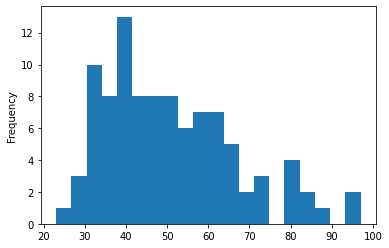

In [ ]:
data['GF'].plot.hist(bins=20)

## Exercici 2
###  Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.



**Realizaremos un pearsonr test para valora si la distribución es normal**

Compararemos partidos perdidos 'L' vs goles en contra 'GA'

[scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html?highlight=pearsonr)

Pearson correlation coefficient and p-value for testing non-correlation.

This function also performs a test of the null hypothesis that the distributions underlying the samples are uncorrelated and normally distributed. 

In [ ]:
print('Null hypothesis Ho ->  The distributions underlying the samples are uncorrelated and normally distributed.')
print('Hipotesis alternativa H1 -> The distributions underlying the samples are correlated and no normally distributed.\n\n')

alfa = 0.05

a = data.GA
b = data.L

#ttest, pvalue = stats.ttest_rel(a, b) #Tests whether the means of two paired samples are significantly different.
ttest, pvalue = stats.pearsonr(a, b) #Tests whether two samples have a linear relationship.

if pvalue < alfa:
  print(f"Para un alfa de {alfa*100}% rechazamos la hipotesis nula con pvalue de {pvalue*100}%")
  print("The distributions underlying the samples are correlated and NO normally distributed.")
else:
  print(f"Para un alfa de {alfa*100}% aceptamos la hipotesis nula con pvalue de {pvalue*100}%")
  print("The distributions underlying the samples are UNcorrelated and normally distributed.")


Null hypothesis Ho ->  The distributions underlying the samples are uncorrelated and normally distributed.
Hipotesis alternativa H1 -> The distributions underlying the samples are correlated and no normally distributed.


Para un alfa de 5.0% rechazamos la hipotesis nula con pvalue de 2.0267384124038156e-25%
The distributions underlying the samples are correlated and NO normally distributed.


Rechazar la hipotesi nula en este caso en concreto, significa que los goles en contra no son producto de un hecho aleatorio. En este caso estan influeciada directamente por los partidos perdidos. 'GA' es dependiente de 'L'.

## Exercici 3
### Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.





**Realizaremos un one-way ANOVA test para valora si comparten media poblacional**

Calcularemos sobre los atributos 'Pts'  'GF'  'W'

[scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes. 

In [4]:

alfa = 0.05

puntos = data.Pts
goles = data.GF
ganados = data.W

ttest, pvalue = stats.f_oneway(puntos, goles, ganados)


if pvalue < alfa:
  print(f"Para un alfa de {alfa*100}% rechazamos la hipotesis nula con pvalue de {pvalue*100}%")
  print("Los atributos NO tienen una media comun")
else:
  print(f"Para un alfa de {alfa*100}% aceptamos la hipotesis nula con pvalue de {pvalue*100}%")
  print("Los atributos SI tienen una media comun")

Para un alfa de 5.0% rechazamos la hipotesis nula con pvalue de 2.1373590359779205e-60%
Los atributos NO tienen una media comun
